# Face Face Recognition Sytem

In [1]:
import os
import cv2
import numpy as np
import pandas as pd

from insightface.app import FaceAnalysis

In [2]:
# configure face analysis
faceapp = FaceAnalysis(name='buffalo_sc',
                       root='insightface_model',
                       providers=['CPUExecutionProvider'])

faceapp.prepare(ctx_id=0, det_size=(640,640), det_thresh=0.5)
# warning: don't set det_thresh < 0.3

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model/models/buffalo_sc/det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model/models/buffalo_sc/w600k_mbf.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [3]:
os.listdir()

['test_images',
 '.DS_Store',
 'images',
 '2_Fast_face_recognition_system.ipynb',
 '3_Save_and_Retrive_data_from_to_redis_database.ipynb',
 '__pycache__',
 'face_rec.py',
 '1_insightface_understanding.ipynb',
 '.ipynb_checkpoints',
 'abhigna.jpg',
 'test_image_2.jpg',
 'dataframe_students_teacher.npz',
 'insightface_model',
 'test_image_1.jpg',
 '4_Predictions.ipynb']

#### Extract Facial Features and labels

In [4]:
import re # regular expression

In [5]:
def clean_name(string):
    # Allow only A-Z a-z
    string = re.sub(r'[^A-Za-z]',' ',string)
    string = string.title()
    return string

In [6]:
import os
import cv2
  # Assuming you have a module named faceapp for facial recognition

def clean_name(name):
    # Add your cleaning logic here
    return name

person_info = []
listdir = os.listdir(path='images')

for folder_name in listdir:
    # Exclude files or directories starting with a dot (.)
    if not folder_name.startswith('.'):
        # Split folder_name and check if it contains the expected number of elements
        parts = folder_name.split('-')

        if len(parts) == 2:
            role, name = parts
            name = clean_name(name)
            role = clean_name(role)

            # path of each image in the respective folder
            img_files = os.listdir(path=f'images/{folder_name}')

            for file in img_files:
                path = f'./images/{folder_name}/{file}'

                # step-1: read the image
                img_arr = cv2.imread(path)

                # step-2: get the info
                result = faceapp.get(img_arr, max_num=1)  # Assuming faceapp.get returns a list

                if len(result) > 0:
                    res = result[0]
                    embedding = res['embedding']
                    person_info.append([name, role, embedding])
                    # Continue with the rest of your code to extract and save information
        else:
            print(f"Skipping folder {folder_name} as it doesn't match the expected format.")


In [7]:
print(person_info)

[['Barack_Obama', 'teacher', array([ 8.67771804e-01, -2.67445743e-01,  7.07543492e-02, -1.44099891e-01,
        2.39771277e-01, -1.20660281e+00,  1.22747755e+00,  1.86506540e-01,
       -3.33467913e+00, -1.06722093e+00,  2.18844676e+00, -7.47084767e-02,
        1.29201114e-01, -5.12315571e-01,  3.15695822e-01, -2.37227106e+00,
        1.21420610e+00,  8.17333043e-01, -7.51783490e-01, -1.11195636e+00,
       -4.89236891e-01,  2.91429353e+00, -1.24994183e+00,  4.89364326e-01,
        7.34778643e-01, -9.18741107e-01, -4.47340250e-01, -2.17646644e-01,
        2.18412495e+00, -3.37960333e-01,  1.29642606e-01,  6.55971944e-01,
       -3.00909191e-01, -6.19833350e-01, -2.02316761e-01, -8.13053250e-01,
       -8.22720468e-01,  7.75237799e-01,  1.63761771e+00,  4.45516944e-01,
        2.85517311e+00,  1.11246967e+00,  6.41972184e-01, -2.35994673e+00,
       -4.24495518e-01, -1.46328437e+00, -1.57621026e+00, -2.78016925e-02,
       -1.53501952e+00, -1.03213763e+00,  9.35214400e-01,  7.99294710e-

In [8]:
dataframe = pd.DataFrame(person_info,columns=['Name','Role','Facial_Features'])
dataframe # store in redis

,Name,Role,Facial_Features
0,Barack_Obama,teacher,"[0.8677718, -0.26744574, 0.07075435, -0.144099..."
1,Barack_Obama,teacher,"[1.6967477, -0.99423957, -0.22416869, -1.75014..."
2,Barack_Obama,teacher,"[2.2778592, -1.3971025, 1.563463, -1.4800109, ..."
3,Barack_Obama,teacher,"[-0.065466456, 0.015240222, -0.85319084, -0.32..."
4,Barack_Obama,teacher,"[0.33165765, -1.2775139, 0.40062493, -1.360396..."
5,Barack_Obama,teacher,"[1.4105674, -0.41731554, -0.4466652, -1.443361..."
6,Barack_Obama,teacher,"[1.6049532, -0.24349228, 0.36104465, 0.0407292..."
7,Barack_Obama,teacher,"[0.5897457, 0.43560246, 0.35933226, -2.803235,..."
8,Barack_Obama,teacher,"[0.7226656, -0.9443346, -0.0875811, -2.4037802..."
9,Barack_Obama,teacher,"[0.04952857, -0.49288934, -0.19513485, -1.1228..."


## Inference

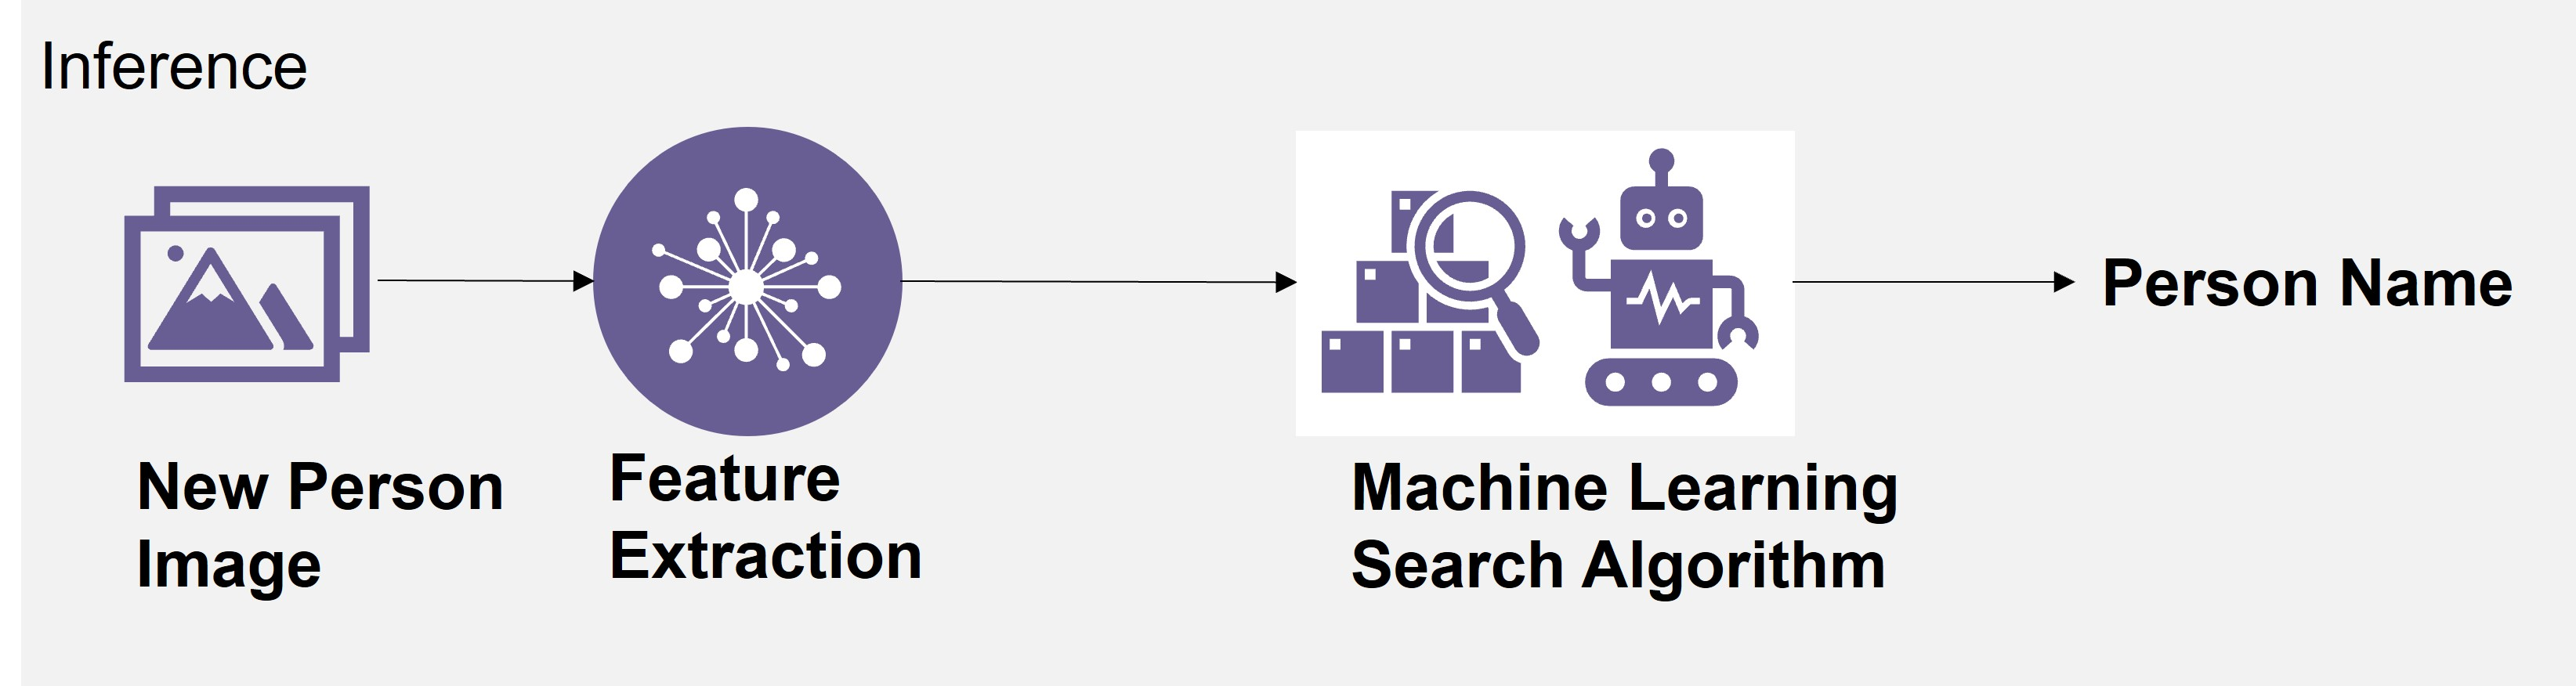

#### step-1: read image

In [9]:
# read test image
img_test = cv2.imread('test_images/test_2.jpeg')
cv2.imshow('test image',img_test)
cv2.waitKey(0) 
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

#### step -2: Extract Feature

In [10]:
res_test = faceapp.get(img_test,max_num=0)
for i, rt in enumerate(res_test):
    print('current loop =',i)
    bbox = rt['bbox'].astype(int)
    score = int(rt['det_score']*100)
    embed_test = rt['embedding']
    

current loop = 0


In [11]:
# consider only one sample
len(embed_test)

512

In [12]:
embed_test

array([-1.0785795 , -1.1072035 , -1.2359028 , -1.1190417 ,  1.6916184 ,
        1.2588977 , -0.42485052,  1.2528399 ,  1.9024427 ,  1.1879566 ,
       -2.2456725 ,  2.0354242 , -0.16842246,  0.53058004,  0.30028483,
       -0.21257854,  0.3056281 , -1.0242338 ,  0.23906758,  1.2245314 ,
       -0.31446412, -1.1225427 ,  2.4335988 ,  1.0288785 ,  0.6126595 ,
       -1.2186719 ,  1.4719703 , -0.37878704, -1.1319803 ,  1.2428073 ,
        1.1628743 ,  0.49313593,  0.968555  ,  0.03850073,  0.40863132,
       -0.413023  ,  0.01802665,  0.35701555,  0.91273737, -0.13445064,
       -1.5695534 ,  1.4075103 ,  0.95294166, -0.38528562,  0.08793437,
       -0.47209278, -0.2068274 ,  1.1180981 ,  0.77529645, -0.74925244,
       -2.0977917 ,  0.9927349 , -1.8607528 , -2.0641649 , -0.8853118 ,
       -0.03283094,  2.2557952 ,  0.24470145, -0.39092267, -1.2569765 ,
       -0.8223587 ,  0.22203036,  0.57044303,  0.37372783, -1.178931  ,
        0.8613467 ,  0.08270417,  0.7168833 ,  1.316746  ,  0.48

#### Algorithm

In [13]:
X_list =  dataframe['Facial_Features'].tolist()
X = np.asarray(X_list)

In [14]:
X.shape

(50, 512)

In [15]:
from sklearn.metrics import pairwise

In [16]:
y = embed_test.reshape(1,512) # 1 x 512

equlidean_distance = pairwise.euclidean_distances(X,y)
manhattan_distance = pairwise.manhattan_distances(X,y)
cosine_similar = pairwise.cosine_similarity(X,y)

In [17]:
data_search = dataframe.copy()
data_search['equlidean'] = equlidean_distance
data_search['manhattan'] = manhattan_distance
data_search['cosine'] = cosine_similar

In [18]:
data_search

,Name,Role,Facial_Features,equlidean,manhattan,cosine
0,Barack_Obama,teacher,"[0.8677718, -0.26744574, 0.07075435, -0.144099...",35.685818,644.639532,-0.095821
1,Barack_Obama,teacher,"[1.6967477, -0.99423957, -0.22416869, -1.75014...",32.884262,589.943204,-0.134625
2,Barack_Obama,teacher,"[2.2778592, -1.3971025, 1.563463, -1.4800109, ...",34.865894,639.163588,-0.094111
3,Barack_Obama,teacher,"[-0.065466456, 0.015240222, -0.85319084, -0.32...",36.929321,662.520381,-0.070045
4,Barack_Obama,teacher,"[0.33165765, -1.2775139, 0.40062493, -1.360396...",34.171993,614.056663,-0.008363
5,Barack_Obama,teacher,"[1.4105674, -0.41731554, -0.4466652, -1.443361...",35.303631,656.479692,-0.074950
6,Barack_Obama,teacher,"[1.6049532, -0.24349228, 0.36104465, 0.0407292...",35.881924,654.347307,-0.074587
7,Barack_Obama,teacher,"[0.5897457, 0.43560246, 0.35933226, -2.803235,...",34.694305,634.587962,-0.084586
8,Barack_Obama,teacher,"[0.7226656, -0.9443346, -0.0875811, -2.4037802...",35.139378,637.096814,-0.034376
9,Barack_Obama,teacher,"[0.04952857, -0.49288934, -0.19513485, -1.1228...",33.291656,599.762273,-0.031118


In [19]:
import matplotlib.pyplot as plt

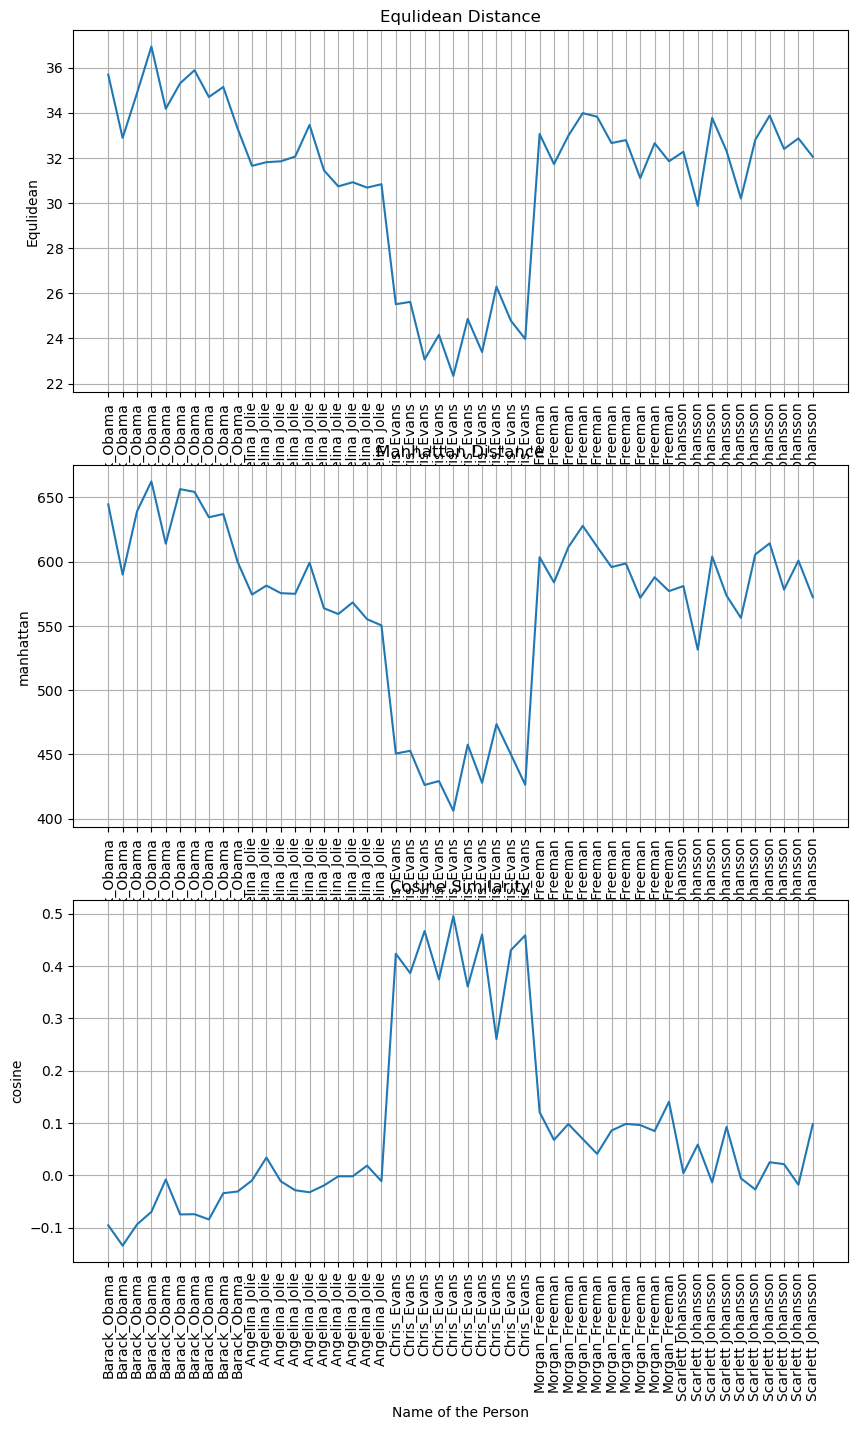

In [20]:
plt.figure(figsize=(10,16))
plt.subplot(3,1,1)
plt.plot(data_search['equlidean'],)
plt.xticks(ticks=list(range(len(data_search['equlidean']))),
           labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the Person')
plt.ylabel('Equlidean')
plt.title('Equlidean Distance')
plt.grid()

plt.subplot(3,1,2)
plt.plot(data_search['manhattan'],)
plt.xticks(ticks=list(range(len(data_search['manhattan']))),
           labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the Person')
plt.ylabel('manhattan')
plt.title('Manhattan Distance')
plt.grid()


plt.subplot(3,1,3)
plt.plot(data_search['cosine'],)
plt.xticks(ticks=list(range(len(data_search['cosine']))),
           labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the Person')
plt.ylabel('cosine')
plt.title('Cosine Similarity')
plt.grid()


plt.show()

### Identify the Person using Equlidean Distance

In [21]:
d_eq_optimal = 25

In [22]:
datafilter = data_search.query(f'equlidean < {d_eq_optimal}')
datafilter.reset_index(drop=True,inplace=True)

if len(datafilter) > 0:
    argmin = datafilter['equlidean'].argmin()
    name , role = datafilter.loc[argmin][['Name','Role']]
    
else:
    name = 'Unknown'
    role = 'Unknown'

In [23]:
print(name, role)

Chris_Evans student


### Identify the Person using Manhattan Distance

In [24]:
d_man_optimal = 450

In [25]:
datafilter = data_search.query(f'manhattan < {d_man_optimal}')
datafilter.reset_index(drop=True,inplace=True)

if len(datafilter) > 0:
    argmin = datafilter['manhattan'].argmin()
    name_man , role_man = datafilter.loc[argmin][['Name','Role']]
    
else:
    name_man = 'Unknown'
    role_man = 'Unknown'

In [26]:
print(name, role)

Chris_Evans student


### Identify the Person using Cosine Similarity

In [27]:
S_opt = 0.4

In [28]:
datafilter = data_search.query(f'cosine > {S_opt}')
datafilter.reset_index(drop=True,inplace=True)

if len(datafilter) > 0:
    argmax = datafilter['cosine'].argmax()
    name_cos , role_cos = datafilter.loc[argmax][['Name','Role']]
    
else:
    name_cos = 'Unknown'
    role_cos = 'Unknown'

In [29]:
print(name_cos, role_cos)

Chris_Evans student


In [30]:
datafilter

,Name,Role,Facial_Features,equlidean,manhattan,cosine
0,Chris_Evans,student,"[1.7492044, -2.1218064, -0.15239638, -0.905720...",25.514286,450.670651,0.423421
1,Chris_Evans,student,"[1.3108517, -2.0901608, -1.0368989, -1.7980275...",23.064388,426.207376,0.466915
2,Chris_Evans,student,"[0.59088683, -1.4150397, -0.67269367, -1.31097...",22.335033,406.105201,0.495242
3,Chris_Evans,student,"[0.35467762, -0.69756144, -0.30049866, -1.9114...",23.396021,427.879617,0.460184
4,Chris_Evans,student,"[0.4494092, -1.6313883, -0.9509721, -1.5428782...",24.786192,450.061177,0.430181
5,Chris_Evans,student,"[0.8588394, -1.1002173, -0.77001274, -1.491779...",23.973528,426.329300,0.458686


### Identify Multiple Person in an Image

In [31]:
def ml_search_algorithm(dataframe, feature_column, test_vector,
                        name_role=['Name', 'Role'], thresh=0.5):
    dataframe = dataframe.copy()
    X_list = dataframe[feature_column].tolist()

    # Find the maximum length among all facial features
    max_length = max(len(x) for x in X_list)

    # Pad or truncate each facial feature to the maximum length
    X_list = [np.pad(x, (0, max_length - len(x)), 'constant') if len(x) < max_length else x[:max_length] for x in X_list]

    x = np.asarray(X_list)

    similar = pairwise.cosine_similarity(x, test_vector.reshape(1, -1))
    similar_arr = np.array(similar).flatten()
    dataframe['cosine'] = similar_arr

    data_filter = dataframe.query(f'cosine >= {thresh}')
    if len(data_filter) > 0:
        data_filter.reset_index(drop=True, inplace=True)
        argmax = data_filter['cosine'].argmax()
        person_name, person_role = data_filter.loc[argmax][name_role]
    else:
        person_name = 'Unknown'
        person_role = 'Unknown'

    return person_name, person_role


In [32]:
test_image = cv2.imread('test_images/test_10.jpg')
cv2.imshow('test image',test_image)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [33]:
dataframe_compress = dataframe.groupby(by=['Name','Role']).mean()
dataframe_compress.reset_index(inplace=True)
dataframe_compress

,Name,Role,Facial_Features
0,Angelina Jolie,student,"[0.43222713, 1.074822, -0.12857957, -1.8332443..."
1,Barack_Obama,teacher,"[0.948603, -0.558349, 0.09484784, -1.2796344, ..."
2,Chris_Evans,student,"[0.72012275, -1.4683539, -0.77757514, -1.46026..."
3,Morgan_Freeman,teacher,"[0.4857939, -0.61931694, -0.4072946, 1.0686711..."
4,Scarlett Johansson,student,"[0.1913062, -0.48871604, -1.6904205, 0.4424578..."


In [34]:
# step-1: take the test image and apply to insight face
results = faceapp.get(test_image)
test_copy = test_image.copy()
# step-2: use for loop and extract each embedding and pass to ml_search_algorithm

for res in results:
    x1, y1, x2, y2 = res['bbox'].astype(int)
    embeddings = res['embedding']
    person_name, person_role = ml_search_algorithm(dataframe_compress,
                                                   'Facial_Features',
                                                   test_vector=embeddings,
                                                   name_role=['Name','Role'],
                                                   thresh=0.5)
    if person_name == 'Unknown':
        color =(0,0,255) # bgr
    else:
        color = (0,255,0)
        
        
    cv2.rectangle(test_copy,(x1,y1),(x2,y2),color)
    
    text_gen = person_name
    cv2.putText(test_copy,text_gen,(x1,y1),cv2.FONT_HERSHEY_DUPLEX,0.7,color,2)
    
    
cv2.imshow('test image',test_copy)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### Compressing my dataset

#### convert dataframe into array and save in numpy zip format

In [35]:
xvalues = dataframe_compress.values

In [36]:
col_name = np.array(dataframe_compress.columns)
col_name

array(['Name', 'Role', 'Facial_Features'], dtype=object)

In [37]:
np.savez('dataframe_students_teacher.npz',xvalues,col_name)

In [38]:
# load the numpy zip
file_np = np.load('dataframe_students_teacher.npz',allow_pickle=True)
file_np.files

['arr_0', 'arr_1']

In [39]:
pd.DataFrame(file_np['arr_0'],columns=file_np['arr_1'])

,Name,Role,Facial_Features
0,Angelina Jolie,student,"[0.43222713, 1.074822, -0.12857957, -1.8332443..."
1,Barack_Obama,teacher,"[0.948603, -0.558349, 0.09484784, -1.2796344, ..."
2,Chris_Evans,student,"[0.72012275, -1.4683539, -0.77757514, -1.46026..."
3,Morgan_Freeman,teacher,"[0.4857939, -0.61931694, -0.4072946, 1.0686711..."
4,Scarlett Johansson,student,"[0.1913062, -0.48871604, -1.6904205, 0.4424578..."


### [END](https://www.udemy.com/user/freeai-space/)
---